In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/BooksDataSet.csv')
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
# removing the unwanted columns

books = books[['genre', 'summary']]
books.head(3)

,genre,summary
0,Fantasy,Drowned Wednesday is the first Trustee among ...
1,Fantasy,"As the book opens, Jason awakens on a school ..."
2,Fantasy,Cugel is easily persuaded by the merchant Fia...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   genre    3000 non-null   object
 1   summary  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

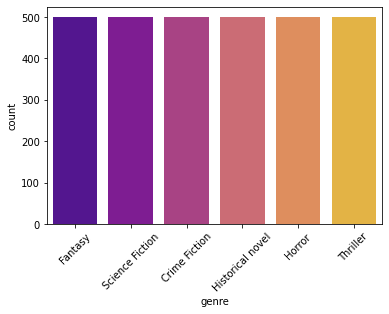

In [ ]:
sn.countplot(x = books['genre'],palette='plasma')
plt.xticks(rotation = '45')

In [ ]:
books['summary'].iloc[1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

#### Plotting the most Frequent Words

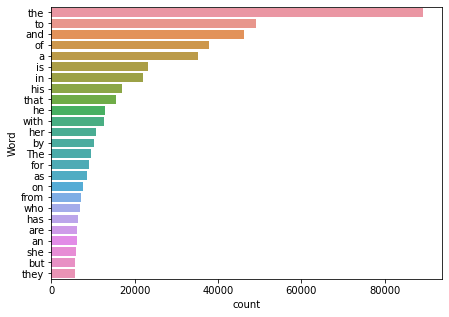

In [ ]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
    
# 25 most frequent words

wordsdf = showmostfrequentwords(books['summary'],25)

In [ ]:
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
3,the,89314
16,to,49141
13,and,46377
46,of,37841
22,a,35106
2,is,23116
80,in,22093
49,his,16849
38,that,15476
51,he,12868


Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

books['genre'] = encoder.fit_transform(books['genre'])

### Removing the stopwords

In [ ]:
books.duplicated().sum()

1

In [ ]:
books.shape

(3000, 2)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
books['num_characters'] = books['summary'].apply(len)

In [ ]:
books.head()

,genre,summary,num_characters
0,1,Drowned Wednesday is the first Trustee among ...,4704
1,1,"As the book opens, Jason awakens on a school ...",3127
2,1,Cugel is easily persuaded by the merchant Fia...,1953
3,1,The book opens with Herald-Mage Vanyel return...,4598
4,1,Taran and Gurgi have returned to Caer Dallben...,6743


In [ ]:
# num of words
books['num_words'] = books['summary'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
books.head()

,genre,summary,num_characters,num_words
0,1,Drowned Wednesday is the first Trustee among ...,4704,936
1,1,"As the book opens, Jason awakens on a school ...",3127,653
2,1,Cugel is easily persuaded by the merchant Fia...,1953,393
3,1,The book opens with Herald-Mage Vanyel return...,4598,903
4,1,Taran and Gurgi have returned to Caer Dallben...,6743,1358


In [ ]:
books['num_sentences'] = books['summary'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
books.head()

,genre,summary,num_characters,num_words,num_sentences
0,1,Drowned Wednesday is the first Trustee among ...,4704,936,45
1,1,"As the book opens, Jason awakens on a school ...",3127,653,21
2,1,Cugel is easily persuaded by the merchant Fia...,1953,393,13
3,1,The book opens with Herald-Mage Vanyel return...,4598,903,46
4,1,Taran and Gurgi have returned to Caer Dallben...,6743,1358,66


In [ ]:
books[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3000.000000,3000.000000,3000.000000
mean,2717.552333,530.763667,21.403333
std,2955.845477,586.652135,25.290259
min,11.000000,1.000000,1.000000
25%,713.750000,138.000000,5.000000
50%,1730.000000,336.000000,13.000000
75%,3816.000000,738.000000,29.000000
max,31263.000000,6598.000000,289.000000


In [ ]:
books[books['genre'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,500.000000,500.000000,500.000000
mean,2148.316000,421.064000,17.222000
std,2818.225775,565.595077,24.541011
min,39.000000,7.000000,1.000000
25%,509.000000,95.000000,4.000000
50%,961.000000,185.000000,7.000000
75%,2714.500000,528.000000,21.000000
max,30144.000000,6335.000000,277.000000


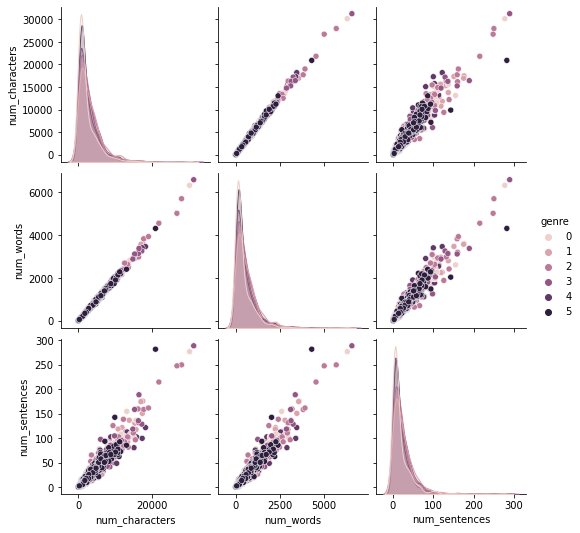

In [ ]:
import seaborn as sns
sns.pairplot(books,hue='genre')

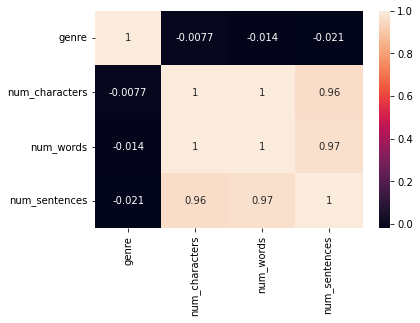

In [ ]:
sns.heatmap(books.corr(),annot=True)

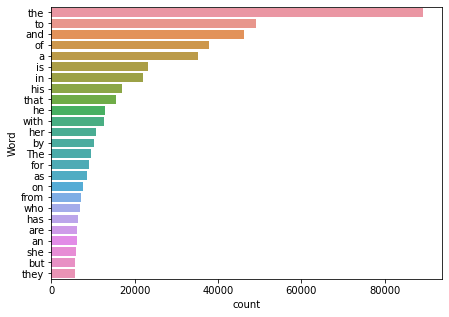

In [ ]:
# visualising frewords

freq_df = showmostfrequentwords(books['summary'],25)

In [ ]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
3,the,89314
16,to,49141
13,and,46377
46,of,37841
22,a,35106
2,is,23116
80,in,22093
49,his,16849
38,that,15476
51,he,12868


##Data Preprocessing

  Lower Case

  Tokenization

  removing speacial character

  removing stopwords

  Stemming

In [ ]:
import string
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
      y.append(lm.lemmatize(i))

    text = y[:]
    y.clear() 

    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
books['transformed_summary'] = books['summary'].apply(transform_text)

In [ ]:
books.head()

,genre,summary,num_characters,num_words,num_sentences,transformed_summary
0,1,Drowned Wednesday is the first Trustee among ...,4704,936,45,drown wednesday first truste among morrow day ...
1,1,"As the book opens, Jason awakens on a school ...",3127,653,21,book open jason awaken school bu unabl rememb ...
2,1,Cugel is easily persuaded by the merchant Fia...,1953,393,13,cugel easili persuad merchant fianosth attempt...
3,1,The book opens with Herald-Mage Vanyel return...,4598,903,46,book open vanyel return countri valdemar exten...
4,1,Taran and Gurgi have returned to Caer Dallben...,6743,1358,66,taran gurgi return caer dallben follow event t...


## Part 2 Model Building

 + Changing from Countvectorizer to TFDIF vectorizer

In [ ]:
X = books['transformed_summary'].values
y = books['genre'].values

In [ ]:
X.shape, y.shape

((3000,), (3000,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Performing tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
svccpred = svc.predict(X_test)
print(metrics.accuracy_score(y_test,svccpred))


0.7316666666666667


In [ ]:
svc.score(X_train,y_train)

0.9945833333333334

In [ ]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

0.7033333333333334


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rfpred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,rfpred))

0.6333333333333333


Save model

In [ ]:
import pickle
file = open('tfdifvector.pkl','wb')
pickle.dump(tfidf,file)
file.close()

In [ ]:

file = open('model.pkl','wb')
pickle.dump(svc,file)
file.close()

In [ ]:
wordnet_down = nltk.download('wordnet',download_dir='./')
wordnet_down

[nltk_data] Downloading package wordnet to ./...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
nltk.download('stopwords',download_dir='./')

[nltk_data] Downloading package stopwords to ./...
[nltk_data]   Unzipping corpora\stopwords.zip.


True